<a href="https://colab.research.google.com/github/vlad-pirvu/random/blob/main/StockMonitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Example - fetch 1 symbol's current stock price
symbol = "TSLA"
current_price = yf.Ticker(symbol).history(period="1d")['Close'][0]
current_price

np.float64(332.04998779296875)

In [21]:
yearsPeriod = 3

start_date = (datetime.today() - timedelta(days=yearsPeriod*365)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')
stockData = yf.download(symbol, start=start_date, end=end_date)
stockData.columns = stockData.columns.droplevel(1)  # Drop the stock symbol level
stockData.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-06-06,238.279999,244.866669,234.350006,244.353333,84204600
2022-06-07,238.886673,239.996674,230.093338,234.000000,72808500
2022-06-08,241.866669,249.963333,239.176666,240.086670,76210500
2022-06-09,239.706665,255.546661,239.326660,249.339996,96491400
2022-06-10,232.229996,239.500000,227.913330,235.156662,97536600


In [20]:
stockData.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-05-28,134.809998,137.250000,134.789993,136.029999,304021100
2025-05-29,139.190002,143.490005,137.910004,142.250000,369241900
2025-05-30,135.130005,139.619995,132.919998,138.720001,333170900
2025-06-02,137.380005,138.119995,135.399994,135.490005,197663100
2025-06-03,141.220001,142.000000,137.949997,138.779999,225578800


In [4]:
# Example - get more detailed stock info
if True:
  symbol = "TSLA"
  stock = yf.Ticker(symbol)
  # get all stock info
  print(stock.info,"\n")
  print(stock.info['ask'],"\n")
  historical = stock.history(period="1mo")
  print(historical)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [5]:
# Extract stock historical data for all symbols
yearsPeriod = 3

if True:

  # Read the CSV file
  #df = pd.read_csv('USD_symbols.csv')
  #symbols=df['symbol'].tolist()
  symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", 'NVDA']

  stocksFolder = "yFinanceStockData"
  # Check if the folder exists, create it if not
  if not os.path.exists(stocksFolder):
    os.makedirs(stocksFolder)
    print(f"Folder '{stocksFolder}' created!")
  else:
    print(f"Folder '{stocksFolder}' already exists.")

  print(f"Extracting historical data for {len(symbols)} symbols.")

  start_date = (datetime.today() - timedelta(days=yearsPeriod*365)).strftime('%Y-%m-%d')
  end_date = datetime.today().strftime('%Y-%m-%d')
  print(f"Time period: From {start_date} to {end_date}.")

  time.sleep(1)
  counter = 1
  for symbol in symbols:
    filename = "yFinanceStockData/" + symbol + ".csv"
    stockData = yf.download(symbol, start=start_date, end=end_date)
    stockData.columns = stockData.columns.droplevel(1)  # Drop the stock symbol level
    stockData.to_csv(filename,index=True)
    print(f"{str(counter)}: {symbol} extracted.")
    time.sleep(0.2)
    counter += 1

  print("Extraction completed.")

Folder 'yFinanceStockData' created!
Extracting historical data for 7 symbols.
Time period: From 2022-06-05 to 2025-06-04.


[*********************100%***********************]  1 of 1 completed


1: AAPL extracted.


[*********************100%***********************]  1 of 1 completed


2: MSFT extracted.


[*********************100%***********************]  1 of 1 completed


3: GOOGL extracted.


[*********************100%***********************]  1 of 1 completed


4: AMZN extracted.


[*********************100%***********************]  1 of 1 completed


5: TSLA extracted.


[*********************100%***********************]  1 of 1 completed


6: META extracted.


[*********************100%***********************]  1 of 1 completed


7: NVDA extracted.
Extraction completed.


In [6]:
# Pool data into a date-indexed dataframe
if True:
  # 1. Define folder path and initialize an empty list for data
  folder_path = "yFinanceStockData/"
  combined_data = []

  # 2. Loop through files and extract only the "Close" column
  for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        symbol = filename.split(".")[0]  # Extract symbol from filename
        filepath = os.path.join(folder_path, filename)

        # Read only the "Close" column, set "Date" as index
        df = pd.read_csv(filepath, usecols=["Date", "Close"], parse_dates=["Date"], index_col="Date")
        df.rename(columns={"Close": symbol}, inplace=True)  # Rename "Close" to symbol
        combined_data.append(df)

  # 3. Combine all data into a single DataFrame
  all_data = pd.concat(combined_data, axis=1)  # Combine along columns
  print(f"Combined DataFrame shape: {all_data.shape}")

Combined DataFrame shape: (751, 7)


In [22]:
all_data.head()

,META,AAPL,MSFT,GOOGL,AMZN,NVDA,TSLA
Date,,,,,,,
2022-06-06,193.338791,143.832458,262.101532,116.264641,124.790001,18.756279,238.279999
2022-06-07,194.732224,146.361877,265.758698,116.592072,123.000000,18.896055,238.886673
2022-06-08,195.717590,145.623734,263.720428,116.636368,121.180000,18.622435,241.866669
2022-06-09,183.136871,140.387726,258.239502,114.289085,116.150002,18.023254,239.706665
2022-06-10,174.746429,134.964722,246.731369,110.632576,109.650002,16.950729,232.229996


In [25]:
#Clean-up the dataframe
if True:
  print(f"Initial DataFrame shape: {all_data.shape}")

  #Identify active stocks (with data in the past 7 days)
  cutoff_date = datetime.today() - timedelta(days=7)
  #all_data.index = pd.to_datetime(all_data.index).tz_convert(None)
  recent_data = all_data.loc[all_data.index >= cutoff_date]
  active_symbols = recent_data.dropna(axis=1, how="all").columns

  #Filter the original DataFrame to include only active stocks
  df = all_data[active_symbols]
  df.index = pd.to_datetime(df.index)
  print(f"Filtered DataFrame shape: {df.shape}")

  print(df.head())

  # Save to CSV
  df.to_csv("filtered_stock_data.csv")
  print("\nFiltered data saved to 'filtered_stock_data.csv'")

Initial DataFrame shape: (751, 7)
Filtered DataFrame shape: (751, 7)
                  META        AAPL        MSFT       GOOGL        AMZN  \
Date                                                                     
2022-06-06  193.338791  143.832458  262.101532  116.264641  124.790001   
2022-06-07  194.732224  146.361877  265.758698  116.592072  123.000000   
2022-06-08  195.717590  145.623734  263.720428  116.636368  121.180000   
2022-06-09  183.136871  140.387726  258.239502  114.289085  116.150002   
2022-06-10  174.746429  134.964722  246.731369  110.632576  109.650002   

                 NVDA        TSLA  
Date                               
2022-06-06  18.756279  238.279999  
2022-06-07  18.896055  238.886673  
2022-06-08  18.622435  241.866669  
2022-06-09  18.023254  239.706665  
2022-06-10  16.950729  232.229996  

Filtered data saved to 'filtered_stock_data.csv'


In [26]:
#Reading the mastertable data from its file
#Run this if it's the first runtime and you don't want to retrieve all data again
if True:
  big_data_file = "filtered_stock_data.csv"
  if not os.path.exists(big_data_file):
    print(f"File '{big_data_file}' does not exist. Data must be retrieved (check cells above.)")
  else:
    print(f"File '{big_data_file}' exists. Reading data...")
    df = pd.read_csv(big_data_file, index_col='Date', parse_dates=['Date'])
    df.index = pd.to_datetime(df.index)
    print(f"Dataframe shape: {df.shape}")

File 'filtered_stock_data.csv' exists. Reading data...
Dataframe shape: (751, 7)


In [27]:
df.head()

,META,AAPL,MSFT,GOOGL,AMZN,NVDA,TSLA
Date,,,,,,,
2022-06-06,193.338791,143.832458,262.101532,116.264641,124.790001,18.756279,238.279999
2022-06-07,194.732224,146.361877,265.758698,116.592072,123.000000,18.896055,238.886673
2022-06-08,195.717590,145.623734,263.720428,116.636368,121.180000,18.622435,241.866669
2022-06-09,183.136871,140.387726,258.239502,114.289085,116.150002,18.023254,239.706665
2022-06-10,174.746429,134.964722,246.731369,110.632576,109.650002,16.950729,232.229996


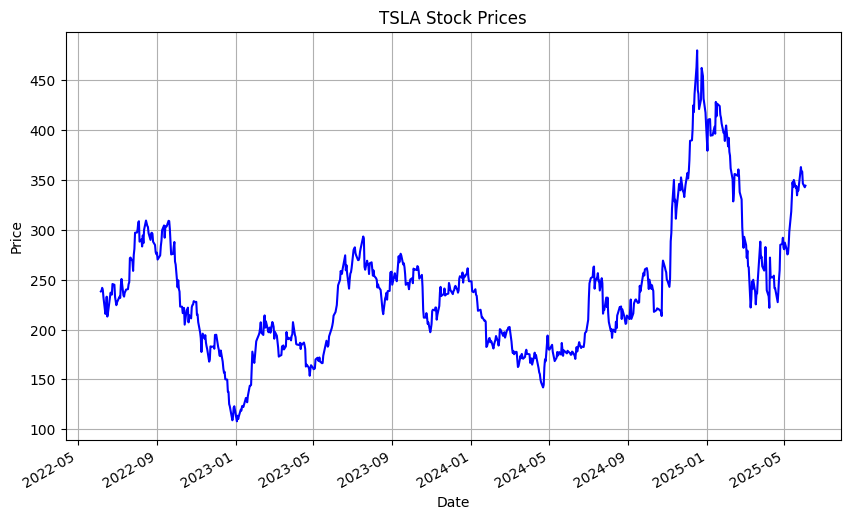

In [28]:
# Plot single symbol stock data
if True:
  symbol = "TSLA"
  df[symbol].plot(figsize=(10, 6), title=symbol + ' Stock Prices', legend=False, color="blue")
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid()
  plt.show()

#Method 2:
#if True:
  #x_values = list(df.index)
  #y_values = list(df['TSLA'])
  #plt.figure(figsize=(10, 5))
  #plt.plot(x_values, y_values, label="TSLA Prices", color="blue")
  #plt.xlabel("Index")
  #plt.ylabel("Price")
  #plt.title("TSLA Stock Prices")
  #plt.legend()
  #plt.grid(True)
  #plt.show()

In [ ]:
print(df.loc['2024-11-26','TSLA'])

338.2300109863281


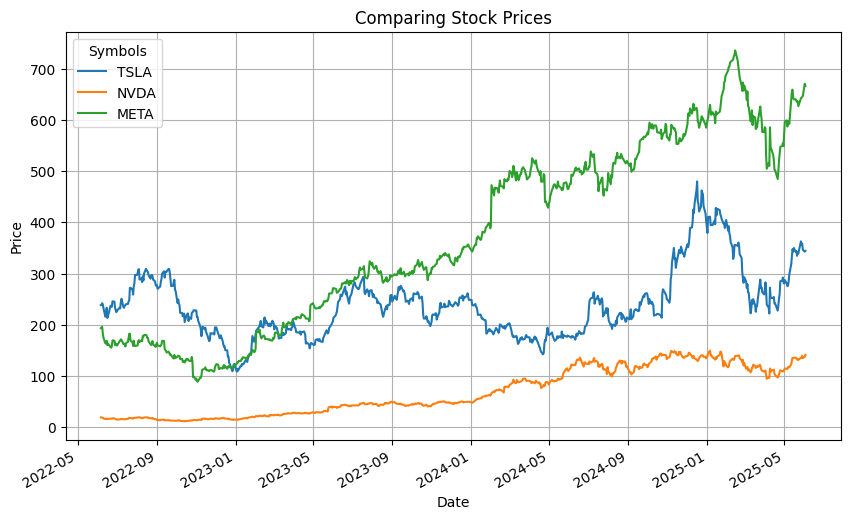

In [29]:
# Plot TSLA, NVDA, META prices
if True:
  df[['TSLA', 'NVDA', 'META']].plot(figsize=(10, 6))

  # Set labels and title
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Comparing Stock Prices')

  # Display the plot
  plt.legend(title="Symbols")
  plt.grid(True)
  plt.show()

In [30]:
df = df[['TSLA']]
# Calculate the threshold date
current_date = datetime.now()
threshold_date = current_date - timedelta(days=365*3)  # Set years

# Filter the DataFrame
df = df[df.index >= threshold_date]
df.head()

,TSLA
Date,
2022-06-06,238.279999
2022-06-07,238.886673
2022-06-08,241.866669
2022-06-09,239.706665
2022-06-10,232.229996


In [34]:
# Calculate long-term mean and standard deviation
baseline_mean = df['TSLA'].mean()
baseline_std = df['TSLA'].std()

# Define thresholds
buy_threshold = baseline_mean - 2 * baseline_std
sell_threshold = baseline_mean + 2 * baseline_std


print(f"Baseline Mean: {baseline_mean:.2f}")
print(f"Buy Threshold: {buy_threshold:.2f}")
print(f"Sell Threshold: {sell_threshold:.2f}")

Baseline Mean: 238.81
Buy Threshold: 107.96
Sell Threshold: 369.66


In [15]:
# Add a "Signal" column to indicate buy/sell
df['Signal'] = np.where(df['TSLA'] < buy_threshold, 'Buy',
                        np.where(df['TSLA'] > sell_threshold, 'Sell', 'Hold'))

# Filter for buy/sell signals
buy_signals = df[df['Signal'] == 'Buy']
sell_signals = df[df['Signal'] == 'Sell']

print("Buy Signals:\n", buy_signals)
print("Sell Signals:\n", sell_signals)

Buy Signals:
                   TSLA Signal
Date                         
2024-06-05  175.000000    Buy
2024-06-06  177.940002    Buy
2024-06-07  177.479996    Buy
2024-06-10  173.789993    Buy
2024-06-11  170.660004    Buy
2024-06-12  177.289993    Buy
2024-06-13  182.470001    Buy
2024-06-14  178.009995    Buy
2024-06-18  184.860001    Buy
2024-06-20  181.570007    Buy
2024-06-21  183.009995    Buy
2024-06-24  182.580002    Buy
Sell Signals:
                   TSLA Signal
Date                         
2024-12-13  436.230011   Sell
2024-12-16  463.019989   Sell
2024-12-17  479.859985   Sell
2024-12-18  440.130005   Sell
2024-12-19  436.170013   Sell
2024-12-24  462.279999   Sell
2024-12-26  454.130005   Sell


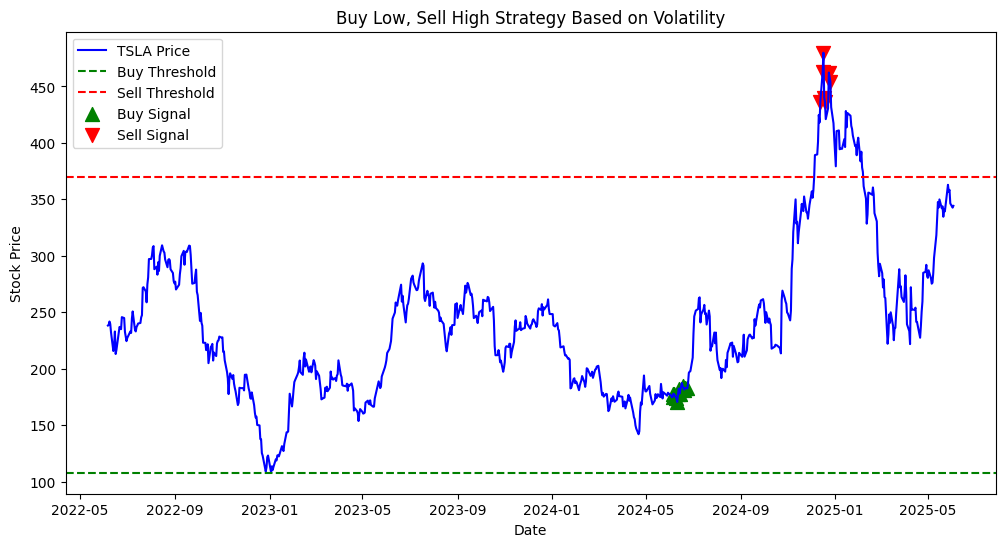

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(list(df.index), list(df['TSLA']), label='TSLA Price', color='blue')
plt.axhline(y=buy_threshold, color='green', linestyle='--', label='Buy Threshold')
plt.axhline(y=sell_threshold, color='red', linestyle='--', label='Sell Threshold')

# Highlight buy/sell points
plt.scatter(buy_signals.index, buy_signals['TSLA'], color='green', label='Buy Signal', marker='^', s=100)
plt.scatter(sell_signals.index, sell_signals['TSLA'], color='red', label='Sell Signal', marker='v', s=100)

plt.title('Buy Low, Sell High Strategy Based on Volatility')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()